## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [6]:
#import the warnings.

import warnings
warnings.filterwarnings('ignore')

In [7]:
#import the useful libraries.
import pandas as pd
import numpy as np

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [12]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv('bank_marketing_updated_v1.csv')

In [13]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [17]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv('bank_marketing_updated_v1.csv',skiprows =2)

In [18]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [19]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

#### Dropping customer id column. 

In [21]:
#drop the customer id as it is of no use.
inp0.drop('customerid',axis=1,inplace = True)
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [23]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0[['job','education']]= inp0['jobedu'].str.split(',',expand = True)
inp0

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [24]:
#drop the "jobedu" column from the dataframe.
inp0 = inp0.drop('jobedu',axis=1)
inp0

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


Drop the records with age missing. 

In [28]:
#drop the records with age missing in inp0.
inp0 = inp0.dropna(subset=['age'])
inp0

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


#### Handling missing values in month column

In [30]:
#count the missing values in month column in inp0.
inp0.month.isnull().sum()

50

In [31]:
#print the percentage of each month in the data frame inp1.
inp0.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [32]:
#find the mode of month in inp1
month_mode = inp0.month.mode()[0]

In [33]:
# fill the missing values with mode value of month in inp1.
inp0['month'] = inp0.month.fillna(month_mode)

In [34]:
#let's see the null values in the month column.
inp0.month.isnull().sum()

0

#### handling missing values in response column 

In [36]:
#count the missing values in response column in inp1.
inp0.response.isnull().sum()

30

In [37]:
#calculate the percentage of missing values in response column. 
inp0.response.shape
float(30/45191)*100

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

In [39]:
#drop the records with response missings in inp1.
inp0 = inp0.dropna(subset = 'response')

In [40]:
#calculate the missing values in each column of data frame: inp1.
inp0.response.isnull().sum()

0

#### handling pdays column. 

In [42]:
#describe the pdays column of inp1.
inp0.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [44]:
#describe the pdays column with considering the -1 values.
inp0['pdays'] = inp0['pdays'].replace(-1,np.nan,regex=True)
inp0.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [45]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      8246 non-null   float64
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(2), int64(5), object(12)
memory usage: 6

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Age variable 

In [50]:
inp0['age'] = inp0['age'].astype(int)

In [51]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  int32  
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      8246 non-null   float64
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(12)
memor

In [52]:
#describe the age variable in inp1.
inp0.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

(array([ 1336., 11733., 12909.,  8007.,  7058.,  3310.,   375.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

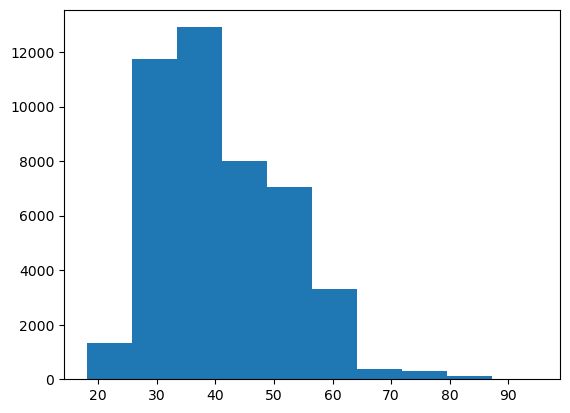

In [53]:
#plot the histogram of age variable.
plt.hist(inp0.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7c11782f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7c11787a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7c1178080>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7c1178e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7c1179100>],
 'means': []}

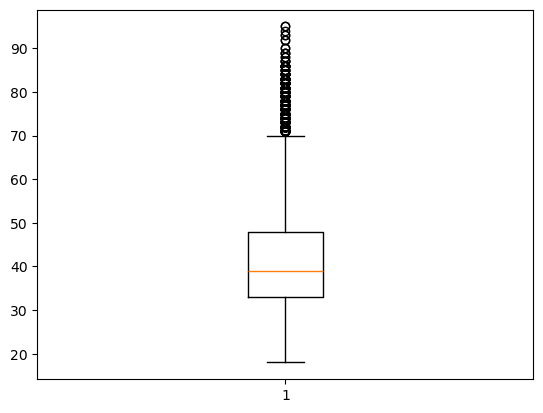

In [54]:
#plot the boxplot of age variable.
plt.boxplot(inp0.age)

#### Salary variable 

In [56]:
#describe the salary variable of inp0.
inp0.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7c22f8da0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7c22ad3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7c118f500>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7c22f97c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7c22f9a90>],
 'means': []}

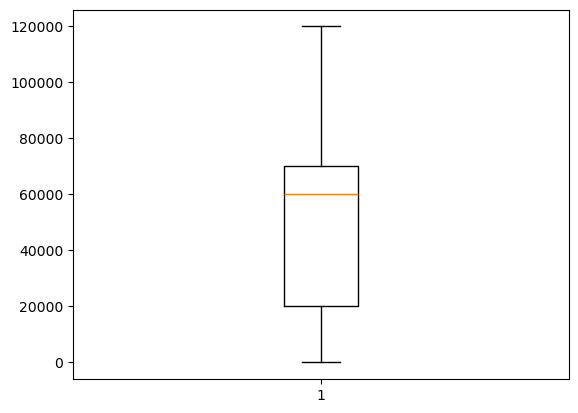

In [57]:
#plot the boxplot of salary variable.
plt.boxplot(inp0.salary)

#### Balance variable 

In [59]:
#describe the balance variable of inp1.
inp0.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7c236c350>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7c236c950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7c236c140>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7c236ce30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7c236d0a0>],
 'means': []}

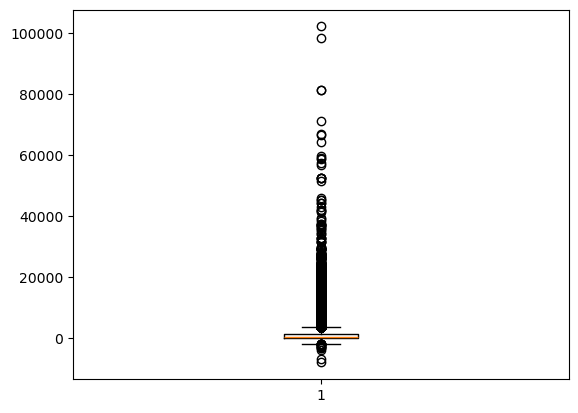

In [60]:
#plot the boxplot of balance variable.
plt.boxplot(inp0.balance)

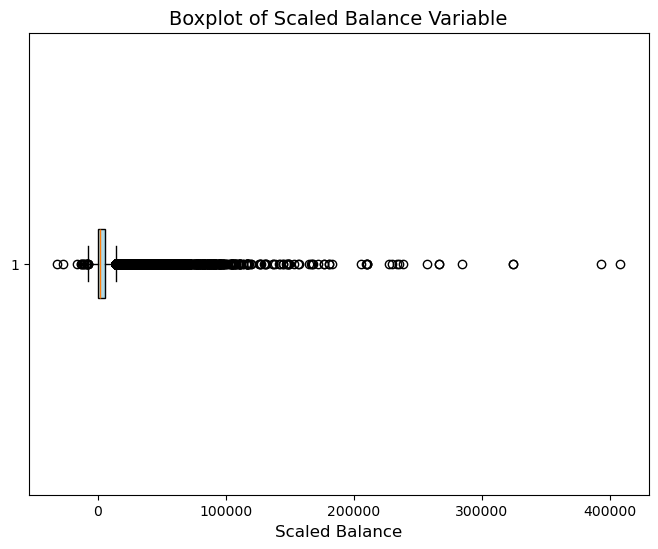

In [61]:
#plot the boxplot of balance variable after scaling in 8:2.
inp0['scaled_balance'] = inp0['balance'] * 8 / 2

# Plot the boxplot of the scaled balance variable
plt.figure(figsize=(8, 6))
plt.boxplot(inp0['scaled_balance'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot of Scaled Balance Variable', fontsize=14)
plt.xlabel('Scaled Balance', fontsize=12)
plt.show()

In [62]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
# Define the quantiles
quantiles = [0.5, 0.7, 0.9, 0.95, 0.99]

# Calculate the quantiles for the 'balance' column
balance_quantiles = inp0['balance'].quantile(quantiles)

# Print the quantiles
print(balance_quantiles)


0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [66]:
#describe the duration variable of inp0
inp0.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [67]:
inp0.duration.head

<bound method NDFrame.head of 0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45161, dtype: object>

In [68]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
def cnvr(duration):
    if "sec" in duration:
        val = float(duration.replace("sec", "").strip())
        return round(val/60,2)
    elif "min" in duration:
        val = float(duration.replace("min","").strip())
        return val
    else: return None

inp0['duration_min'] = inp0.duration.apply(cnvr)
inp0

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,scaled_balance,duration_min
0,58,100000,2143,married,yes,no,yes,no,unknown,5,...,261 sec,1,NaN,0,unknown,no,management,tertiary,8572.0,4.350000
1,44,60000,29,single,yes,no,yes,no,unknown,5,...,151 sec,1,NaN,0,unknown,no,technician,secondary,116.0,2.520000
2,33,120000,2,married,yes,no,yes,yes,unknown,5,...,76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,8.0,1.270000
3,47,20000,1506,married,no,no,yes,no,unknown,5,...,92 sec,1,NaN,0,unknown,no,blue-collar,unknown,6024.0,1.530000
4,33,0,1,single,no,no,no,no,unknown,5,...,198 sec,1,NaN,0,unknown,no,unknown,unknown,4.0,3.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,yes,no,no,no,cellular,17,...,16.2833333333333 min,3,NaN,0,unknown,yes,technician,tertiary,3300.0,16.283333
45207,71,55000,1729,divorced,yes,no,no,no,cellular,17,...,7.6 min,2,NaN,0,unknown,yes,retired,primary,6916.0,7.600000
45208,72,55000,5715,married,yes,no,no,no,cellular,17,...,18.7833333333333 min,5,184.0,3,success,yes,retired,secondary,22860.0,18.783333
45209,57,20000,668,married,yes,no,no,no,telephone,17,...,8.46666666666667 min,4,NaN,0,unknown,no,blue-collar,secondary,2672.0,8.466667


In [69]:
#describe the duration variable
inp0.duration_min.describe()

count    45161.000000
mean         4.302782
std          4.293126
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration_min, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [74]:
#calculate the percentage of each marital status category. 
marital_prct = inp0.marital.value_counts(normalize=True)*100
marital_prct

marital
married     60.195744
single      28.294325
divorced    11.509931
Name: proportion, dtype: float64

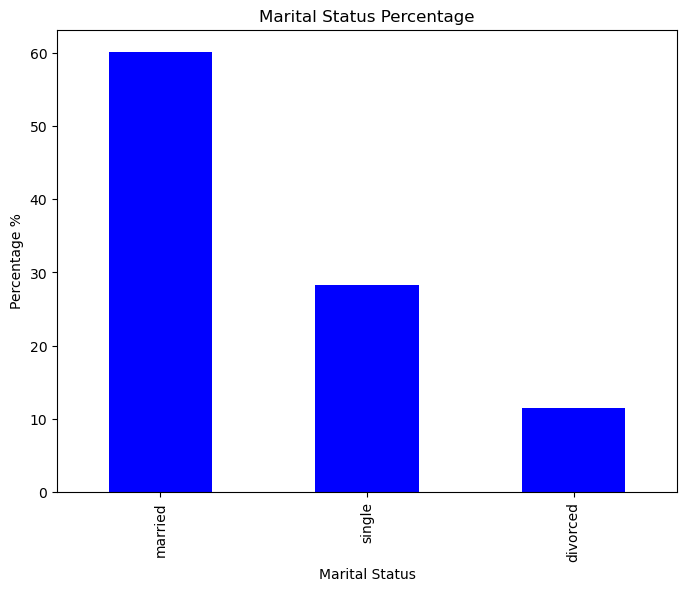

In [75]:
#plot the bar graph of percentage marital status categories
plt.figure(figsize=(8,6))

marital_prct.plot(kind = 'bar',color = 'blue')
plt.title("Marital Status Percentage")
plt.xlabel("Marital Status")
plt.ylabel("Percentage %")
plt.show()

#### Job  

In [77]:
#calculate the percentage of each job status category.
job_status = inp0.job.value_counts(normalize=True) * 100
job_status

job
blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: proportion, dtype: float64

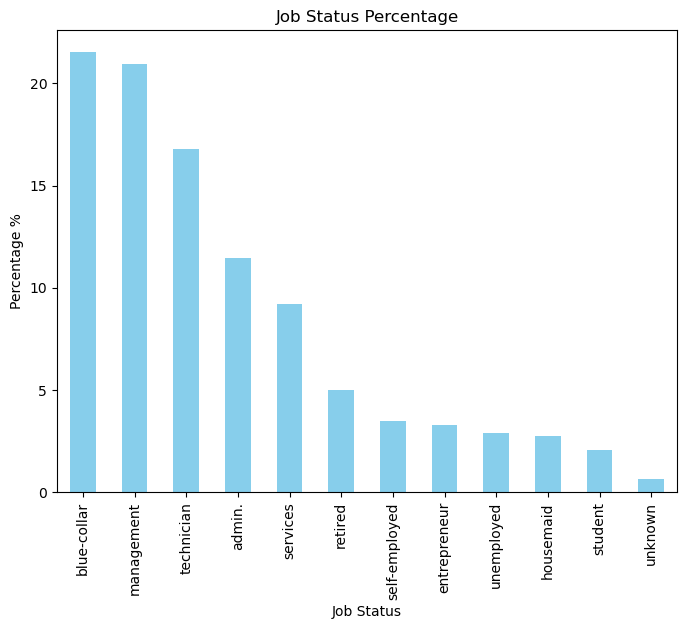

In [78]:
#plot the bar graph of percentage job categories
plt.figure(figsize=(8,6))
job_status.plot(kind = "bar",color="skyblue")
plt.title("Job Status Percentage")
plt.xlabel("Job Status")
plt.ylabel("Percentage %")
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [82]:
#calculate the percentage of each education category.
edu_prct = inp0.education.value_counts(normalize=True) * 100
edu_prct

education
secondary    51.327473
tertiary     29.419189
primary      15.143597
unknown       4.109741
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Education Percentage')

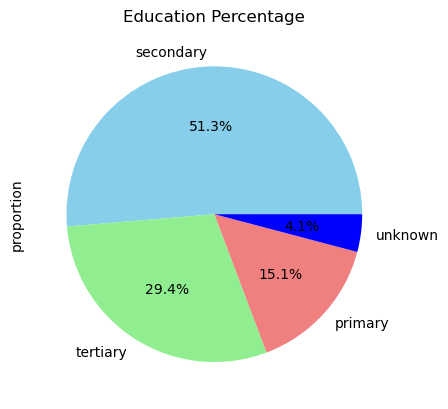

In [83]:
#plot the pie chart of education categories
edu_prct.plot(kind="pie",autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral','blue'])
plt.title("Education Percentage")

#### poutcome 

In [85]:
#calculate the percentage of each poutcome category.
poutcome_prct = inp0.poutcome.value_counts(normalize= True) * 100
poutcome_prct

poutcome
unknown    81.751954
failure    10.836784
other       4.072098
success     3.339164
Name: proportion, dtype: float64

#### Response the target variable 

In [87]:
#calculate the percentage of each response category.
response_prct = inp0.response.value_counts(normalize=True) * 100
response_prct

response
no     88.297425
yes    11.702575
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

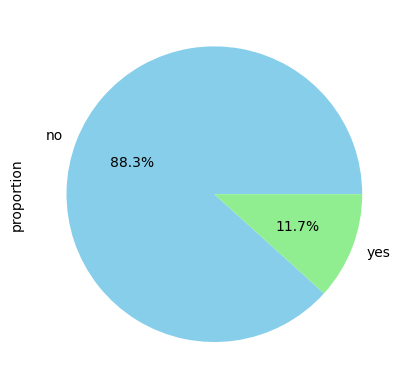

In [88]:
#plot the pie chart of response categories
response_prct.plot(kind="pie",autopct='%1.1f%%',colors=['skyblue','lightgreen'])

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

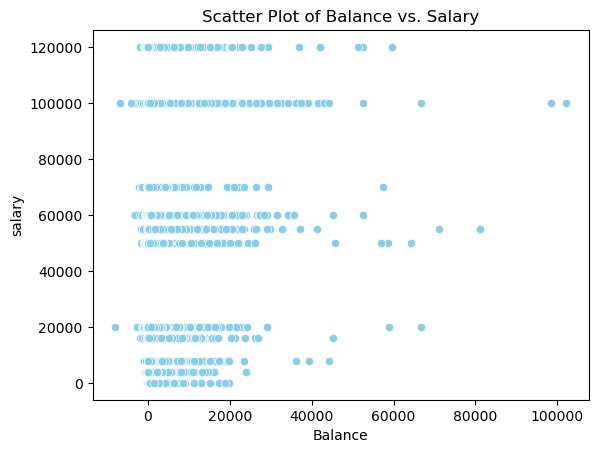

In [92]:
#plot the scatter plot of balance and salary variable in inp0
sns.scatterplot(x=inp0.balance,y=inp0.salary,color= 'skyblue')
plt.xlabel('Balance')
plt.ylabel('salary')
plt.title('Scatter Plot of Balance vs. Salary')
plt.show()

<Axes: xlabel='age', ylabel='balance'>

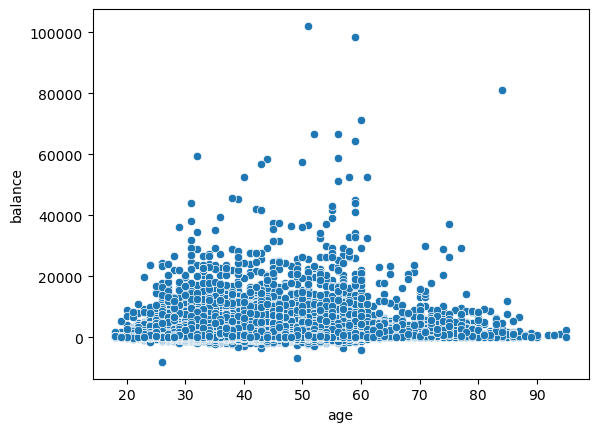

In [93]:
#plot the scatter plot of balance and age variable in inp1
sns.scatterplot(x=inp0['age'],y=inp0['balance'])

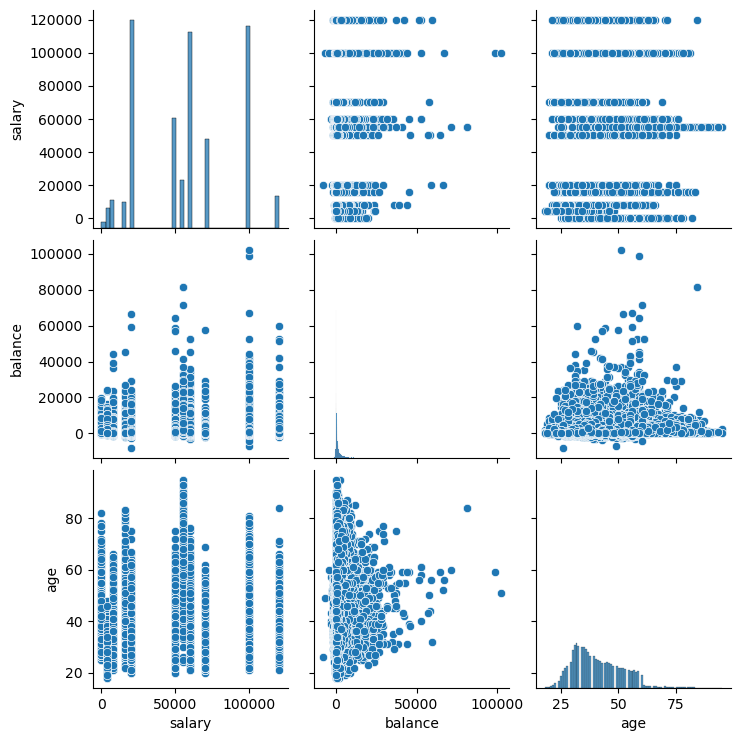

In [94]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(inp0[['salary', 'balance','age']])

#### Correlation heat map 

In [96]:
#plot the correlation matrix of salary, balance and age in inp0 dataframe.
correlation_matrix = inp0[['salary', 'balance', 'age']].corr()
correlation_matrix

,salary,balance,age
salary,1.000000,0.055489,0.024513
balance,0.055489,1.000000,0.097710
age,0.024513,0.097710,1.000000


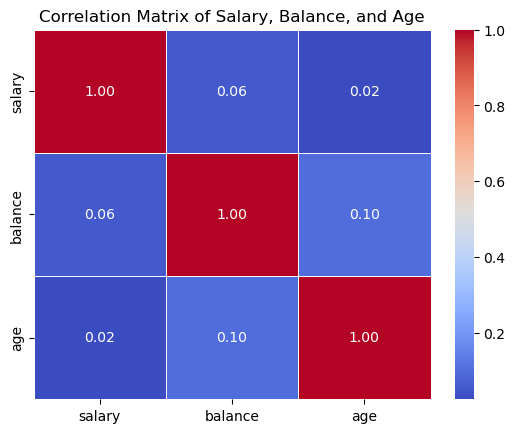

In [97]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Salary, Balance, and Age')
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [100]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
mean_sal_to_res = inp0.groupby('response')['salary'].mean() 
mean_sal_to_res

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [101]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
median_sal_to_res = inp0.groupby('response')['salary'].median() 
median_sal_to_res

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

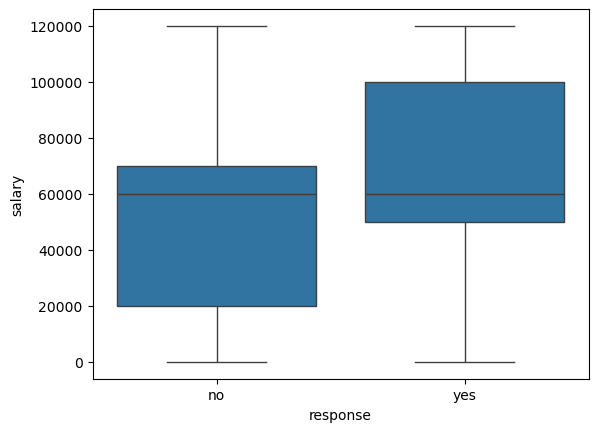

In [102]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(inp0,x = 'response',y='salary')
plt.show()

#### Balance vs response 

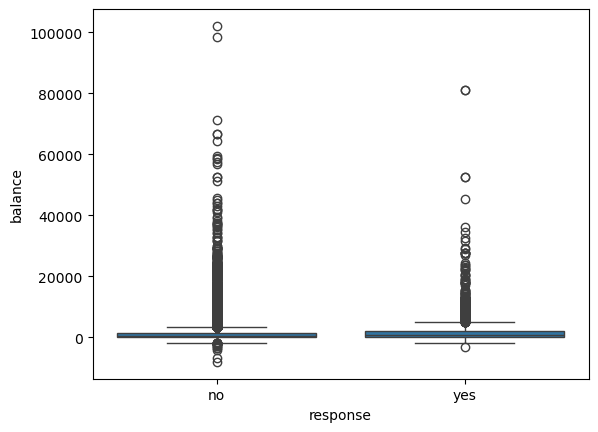

In [104]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(inp0,x='response',y = 'balance')
plt.show()

In [105]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
res_grp_balance = inp0.groupby('response')['balance'].mean()
res_grp_balance

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [106]:
#groupby the response to find the median of the balance with response no & yes seperatly.
res_grp_bal_median = inp0.groupby('response')['balance'].mean()
res_grp_bal_median

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

##### 75th percentile 

In [108]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [109]:
#calculate the mean, median and 75th percentile of balance with response

inp0.groupby('response')['balance'].aggregate(['mean','median',p75])


,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<Figure size 800x600 with 0 Axes>

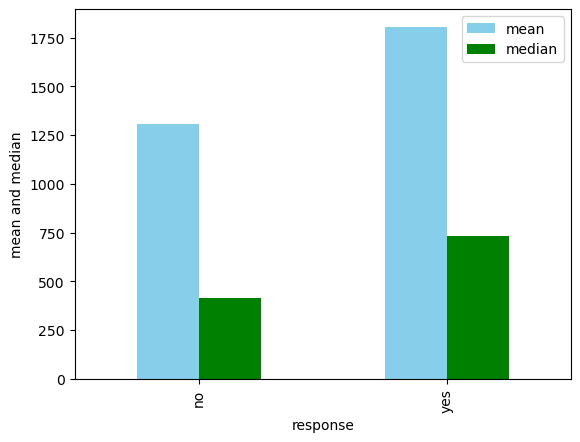

In [110]:
#plot the bar graph of balance's mean and median with response.

grp_stats = inp0.groupby('response')['balance'].aggregate(['mean','median'])
plt.figure(figsize=(8,6))
grp_stats.plot(kind='bar',color=['skyblue','green'])
plt.xlabel('response')
plt.ylabel('mean and median')
plt.show()

#### Education vs salary 

In [112]:
#groupby the education to find the mean of the salary education category.
grp_edu_sal_mean = inp0.groupby('education')['salary'].mean()
grp_edu_sal_mean

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [113]:
#groupby the education to find the median of the salary for each education category.
grp_edu_sal_median = inp0.groupby('education')['salary'].median()
grp_edu_sal_median

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [115]:
#groupby the job to find the mean of the salary for each job category.
grp_job_sal_mean = inp0.groupby('job')['salary'].mean()
grp_job_sal_mean

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [122]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp0['response_flag'] = inp0['response'].replace({'yes': 1, 'no': 0})


#### Education vs response rate

In [123]:
#calculate the mean of response_flag with different education categories.
grp_edu_res_mean = inp0.groupby('education')['response_flag'].mean()
grp_edu_res_mean

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [126]:
#calculate the mean of response_flag with different marital status categories.
grp_marstat_resf_mean = inp0.groupby('marital')['response_flag'].mean()
grp_marstat_resf_mean

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

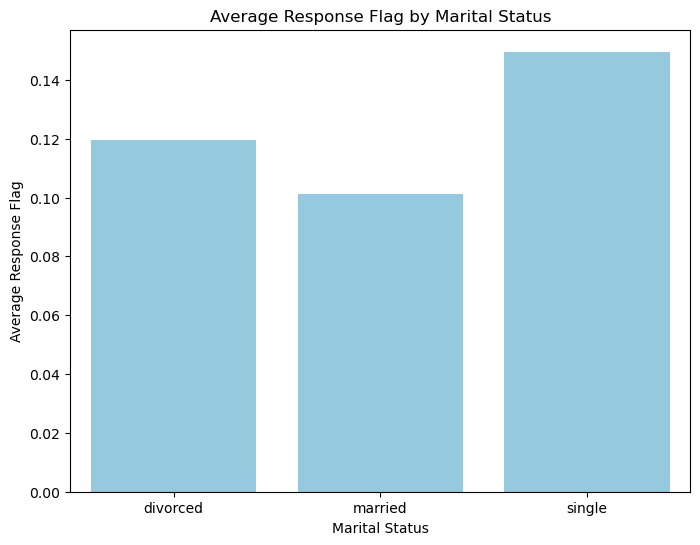

In [132]:
#plot the bar graph of marital status with average value of response_flag
plt.figure(figsize=(8,6))
sns.barplot(x=grp_marstat_resf_mean.index,y=grp_marstat_resf_mean.values,color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Average Response Flag')
plt.title('Average Response Flag by Marital Status')
plt.show()

#### Loans vs response rate 

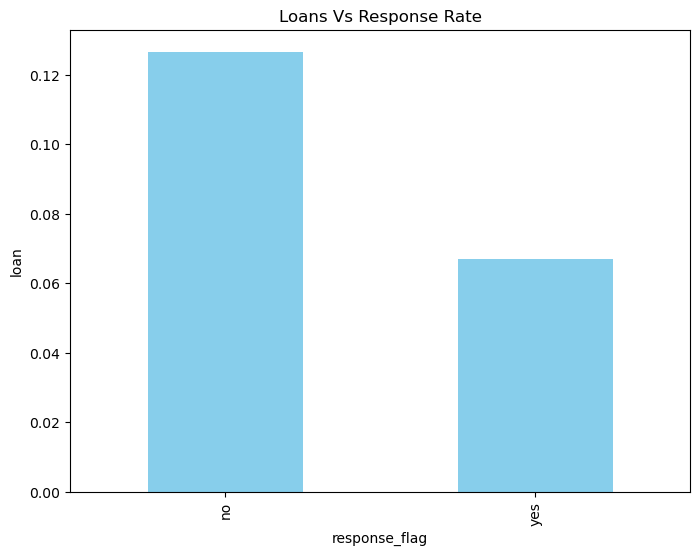

In [135]:
#plot the bar graph of personal loan status with average value of response_flag
grp_loan_resf_mean = inp0.groupby('loan')['response_flag'].mean()
plt.figure(figsize=(8,6))
grp_loan_resf_mean.plot(kind='bar',color='skyblue')
plt.xlabel('response_flag')
plt.ylabel('loan')
plt.title('Loans Vs Response Rate')
plt.show()

#### Housing loans vs response rate 

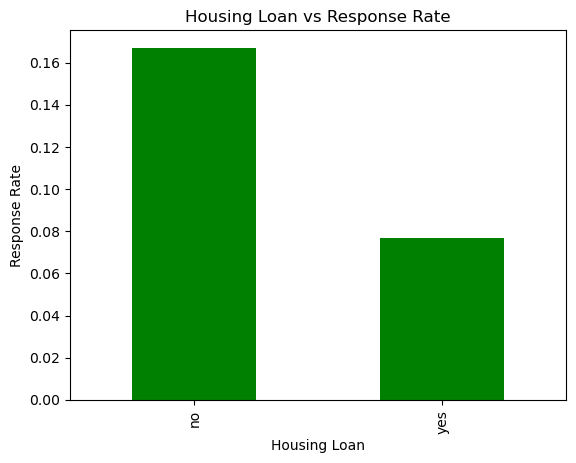

In [137]:
#plot the bar graph of housing loan status with average value of response_flag
grp_housing_resf_mean = inp0.groupby('housing')['response_flag'].mean()
grp_housing_resf_mean.plot(kind='bar',color='green')
plt.title('Housing Loan vs Response Rate')
plt.xlabel('Housing Loan')
plt.ylabel('Response Rate')
plt.show()

#### Age vs response 

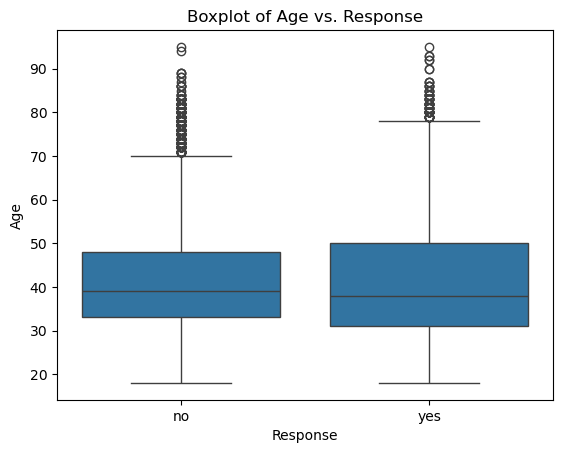

In [147]:
#plot the boxplot of age with response_flag

sns.boxplot(x='response', y='age', data=inp0)
plt.xlabel('Response')
plt.ylabel('Age')
plt.title('Boxplot of Age vs. Response')
plt.show()

##### making buckets from age columns 

In [149]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
bins = [0, 30, 40, 50, 60, np.inf]  
labels = ['<30', '30-40', '40-50', '50-60', '60+']  
inp0['age_bucket'] = pd.cut(inp0['age'], bins=bins, labels=labels, right=False)

inp0


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,pdays,previous,poutcome,response,job,education,scaled_balance,duration_min,response_flag,age_bucket
0,58,100000,2143,married,yes,no,yes,no,unknown,5,...,NaN,0,unknown,no,management,tertiary,8572.0,4.350000,0,50-60
1,44,60000,29,single,yes,no,yes,no,unknown,5,...,NaN,0,unknown,no,technician,secondary,116.0,2.520000,0,40-50
2,33,120000,2,married,yes,no,yes,yes,unknown,5,...,NaN,0,unknown,no,entrepreneur,secondary,8.0,1.270000,0,30-40
3,47,20000,1506,married,no,no,yes,no,unknown,5,...,NaN,0,unknown,no,blue-collar,unknown,6024.0,1.530000,0,40-50
4,33,0,1,single,no,no,no,no,unknown,5,...,NaN,0,unknown,no,unknown,unknown,4.0,3.300000,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,yes,no,no,no,cellular,17,...,NaN,0,unknown,yes,technician,tertiary,3300.0,16.283333,1,50-60
45207,71,55000,1729,divorced,yes,no,no,no,cellular,17,...,NaN,0,unknown,yes,retired,primary,6916.0,7.600000,1,60+
45208,72,55000,5715,married,yes,no,no,no,cellular,17,...,184.0,3,success,yes,retired,secondary,22860.0,18.783333,1,60+
45209,57,20000,668,married,yes,no,no,no,telephone,17,...,NaN,0,unknown,no,blue-collar,secondary,2672.0,8.466667,0,50-60


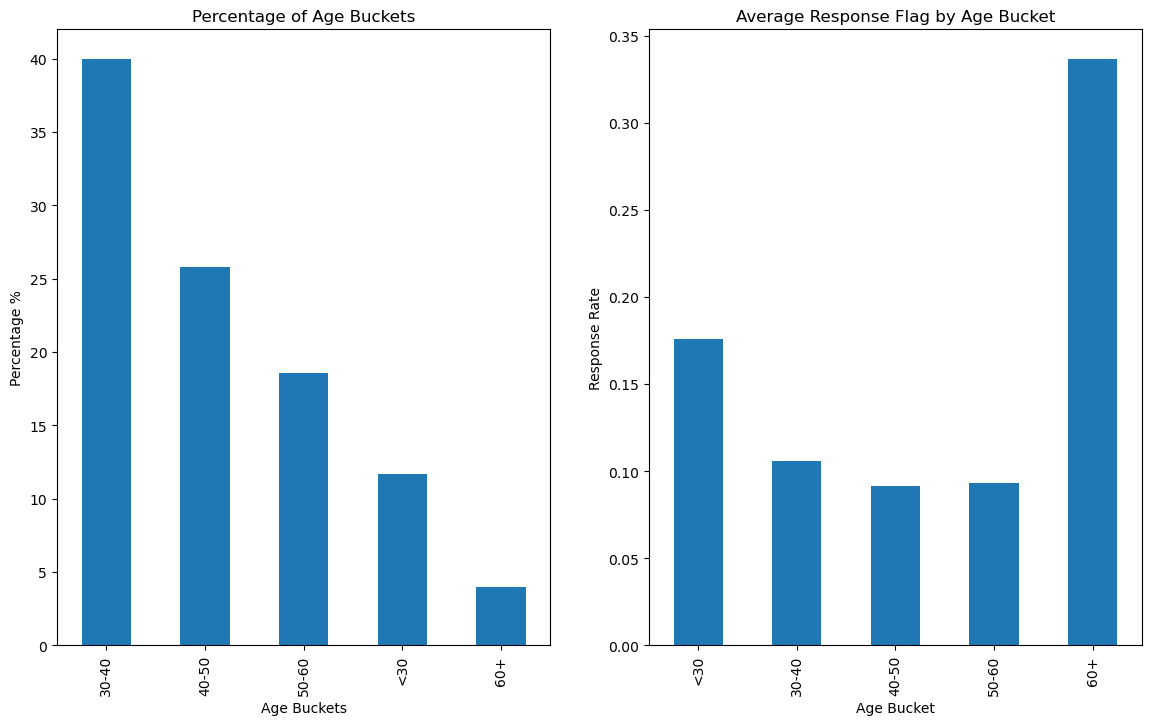

In [169]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
age_bucket_percent = inp0['age_bucket'].value_counts(normalize=True) * 100
grp_agebck_resf_mean = inp0.groupby('age_bucket')['response_flag'].mean()

fig,axes = plt.subplots(1,2,figsize=(14,8))

 # percentage of each buckets
age_bucket_percent.plot(kind='bar',ax = axes[0])
axes[0].set_title('Percentage of Age Buckets')
axes[0].set_xlabel('Age Buckets')
axes[0].set_ylabel('Percentage %')

grp_agebck_resf_mean.plot(kind='bar',ax = axes[1])
axes[1].set_title('Average Response Flag by Age Bucket')
axes[1].set_xlabel('Age Bucket')
axes[1].set_ylabel('Response Rate')

plt.show()

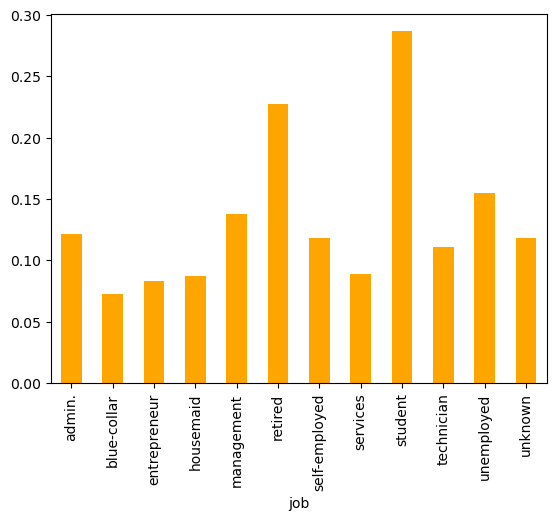

In [173]:
#plot the bar graph of job categories with response_flag mean value.
grp_job_resf_mean = inp0.groupby('job')['response_flag'].mean()
grp_job_resf_mean.plot(kind='bar')

plt.show()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

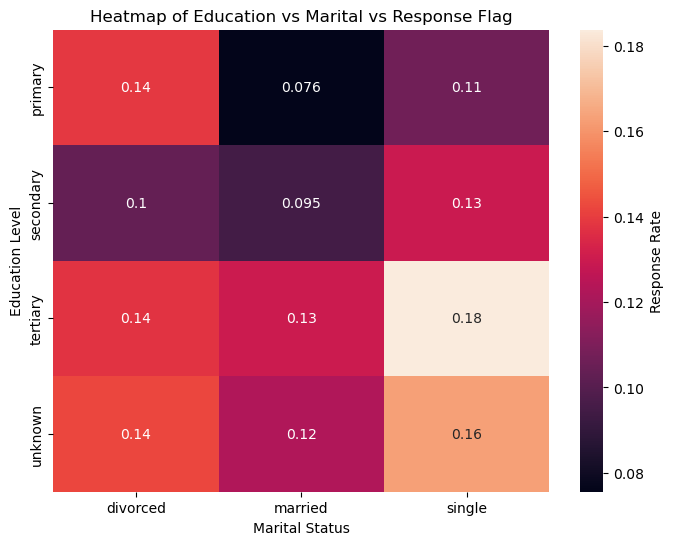

In [195]:
#create heat map of education vs marital vs response_flag
grp_edu_mar_resf = inp0.groupby(['education', 'marital'])['response_flag'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(grp_edu_mar_resf,annot=True,cbar_kws={'label': 'Response Rate'})
plt.title('Heatmap of Education vs Marital vs Response Flag')
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.show()

#### Job vs marital vs response 

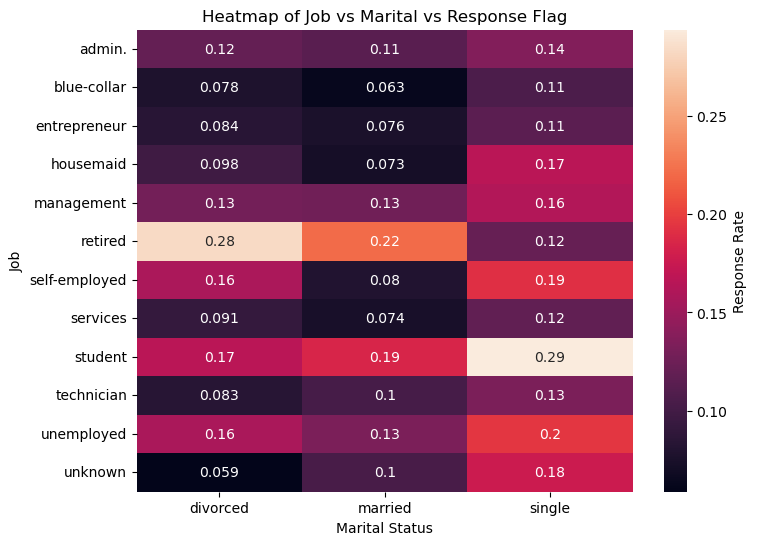

In [193]:
#create the heat map of Job vs marital vs response_flag.
job_mar_resf = inp0.groupby(['job', 'marital'])['response_flag'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(job_mar_resf,annot=True,cbar_kws={'label': 'Response Rate'})
plt.title('Heatmap of Job vs Marital vs Response Flag')
plt.xlabel('Marital Status')
plt.ylabel('Job')
plt.show()

#### Education vs poutcome vs response

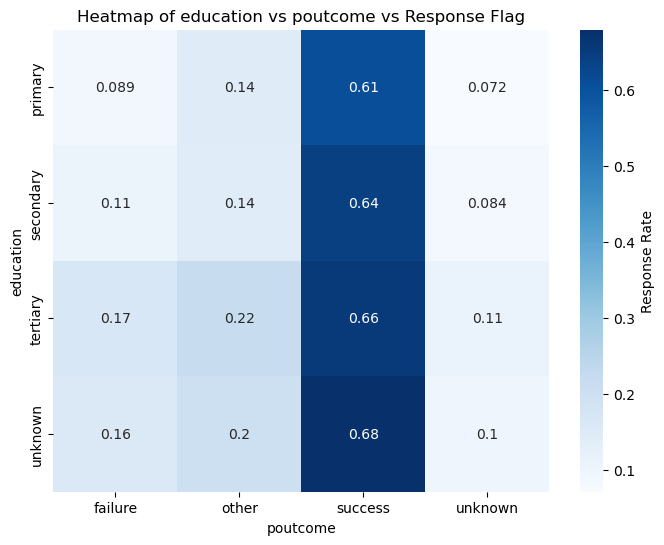

In [197]:
#create the heat map of education vs poutcome vs response_flag.
edu_pot_resf = inp0.groupby(['education', 'poutcome'])['response_flag'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(edu_pot_resf,annot=True,cmap='Blues',cbar_kws={'label': 'Response Rate'})
plt.title('Heatmap of education vs poutcome vs Response Flag')
plt.xlabel('poutcome')
plt.ylabel('education')
plt.show()